In [1]:
# upload libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


from matplotlib import style
style.use('dark_background')

/Users/joaquingianantonio/tensor_flow/env2/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#read the datafile into a dataframe
data_raw = pd.read_csv("dat/online_shoppers_intention.csv.gz")


In [6]:
data_raw.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
#revied head and other info of data
data_raw.shape , data_raw.head(), data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

((12330, 18),
    Administrative  Administrative_Duration  Informational  \
 0               0                      0.0              0   
 1               0                      0.0              0   
 2               0                      0.0              0   
 3               0                      0.0              0   
 4               0                      0.0              0   
 
    Informational_Duration  ProductRelated  ProductRelated_Duration  \
 0                     0.0               1                 0.000000   
 1                     0.0               2                64.000000   
 2                     0.0               1                 0.000000   
 3                     0.0               2                 2.666667   
 4                     0.0              10               627.500000   
 
    BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
 0         0.20       0.20         0.0         0.0   Feb                 1   
 1         0.00       0.10  

In [8]:
data_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [4]:
# storing numerical and categorical feature names

from ipaddress import collapse_addresses


col_names = [name for name in data_raw.dtypes.index]
dtypes = [dtype for dtype in data_raw.dtypes.tolist()]

numeric_features = [name for name, dtype in zip(col_names, dtypes) if (dtype == 'int64') | (dtype == 'float64')]
categorical_features = [name for name in col_names if name not in numeric_features]

numeric_features , categorical_features

(['Administrative',
  'Administrative_Duration',
  'Informational',
  'Informational_Duration',
  'ProductRelated',
  'ProductRelated_Duration',
  'BounceRates',
  'ExitRates',
  'PageValues',
  'SpecialDay',
  'OperatingSystems',
  'Browser',
  'Region',
  'TrafficType'],
 ['Month', 'VisitorType', 'Weekend', 'Revenue'])

In [5]:
data_raw["Revenue"].mean()  #see how many purchases there are as a % of the total observations

0.15474452554744525

In [7]:
# checking unique values for features

for column in data_raw.columns:
    print( column , len(data_raw[column].unique()))



Administrative 27
Administrative_Duration 3335
Informational 17
Informational_Duration 1258
ProductRelated 311
ProductRelated_Duration 9551
BounceRates 1872
ExitRates 4777
PageValues 2704
SpecialDay 6
Month 10
OperatingSystems 8
Browser 13
Region 9
TrafficType 20
VisitorType 3
Weekend 2
Revenue 2


In [8]:
# checking unique values in features

for column in data_raw.columns:
    if len(data_raw[column].unique()) <= 30:
        print(column)
        print(data_raw[column].unique())
        print()


Administrative
[ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]

Informational
[ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]

SpecialDay
[0.  0.4 0.8 1.  0.2 0.6]

Month
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']

OperatingSystems
[1 2 4 3 7 6 8 5]

Browser
[ 1  2  3  4  5  6  7 10  8  9 12 13 11]

Region
[1 9 2 3 4 5 6 7 8]

TrafficType
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]

VisitorType
['Returning_Visitor' 'New_Visitor' 'Other']

Weekend
[False  True]

Revenue
[False  True]



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [32]:
# YOUR CODE HERE (imports!)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report




def train(X, y, standardize = True) -> None:
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 0 , test_size= 0.2)

    if standardize:
        numeric_transformer = Pipeline(steps= [("scaler" , StandardScaler())])
        pipeline = Pipeline(steps = [("numeric", numeric_transformer), 
        ("logistic_regression", LogisticRegression(class_weight= "balanced", random_state= 0))])

    else:
        pipeline = Pipeline(steps= [("logistic_regresion", LogisticRegression(class_weight= "balanced",random_state= 0))])
        

    pipeline.fit(X_train, y_train)   

    y_pred = pipeline.predict(X_test)


    print(classification_report(y_test, y_pred))
    
    # YOUR CODE HERE

In [34]:
# sintax to save data into csv later
#df_reduced.to_csv("dat/UNR_UDD_reduced.csv")

In [9]:
#replacing boolean values in target
df_temp = data_raw["Revenue"].replace(to_replace= ["True", "False"], value= [1 , 0]) #way of replacing the binnary label feature, but have to point to the column to replade
(df_temp == 0).sum(), (df_temp == 1).sum(), 1 - df_temp.mean()

(10422, 1908, 0.8452554744525548)

In [10]:
data_raw.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


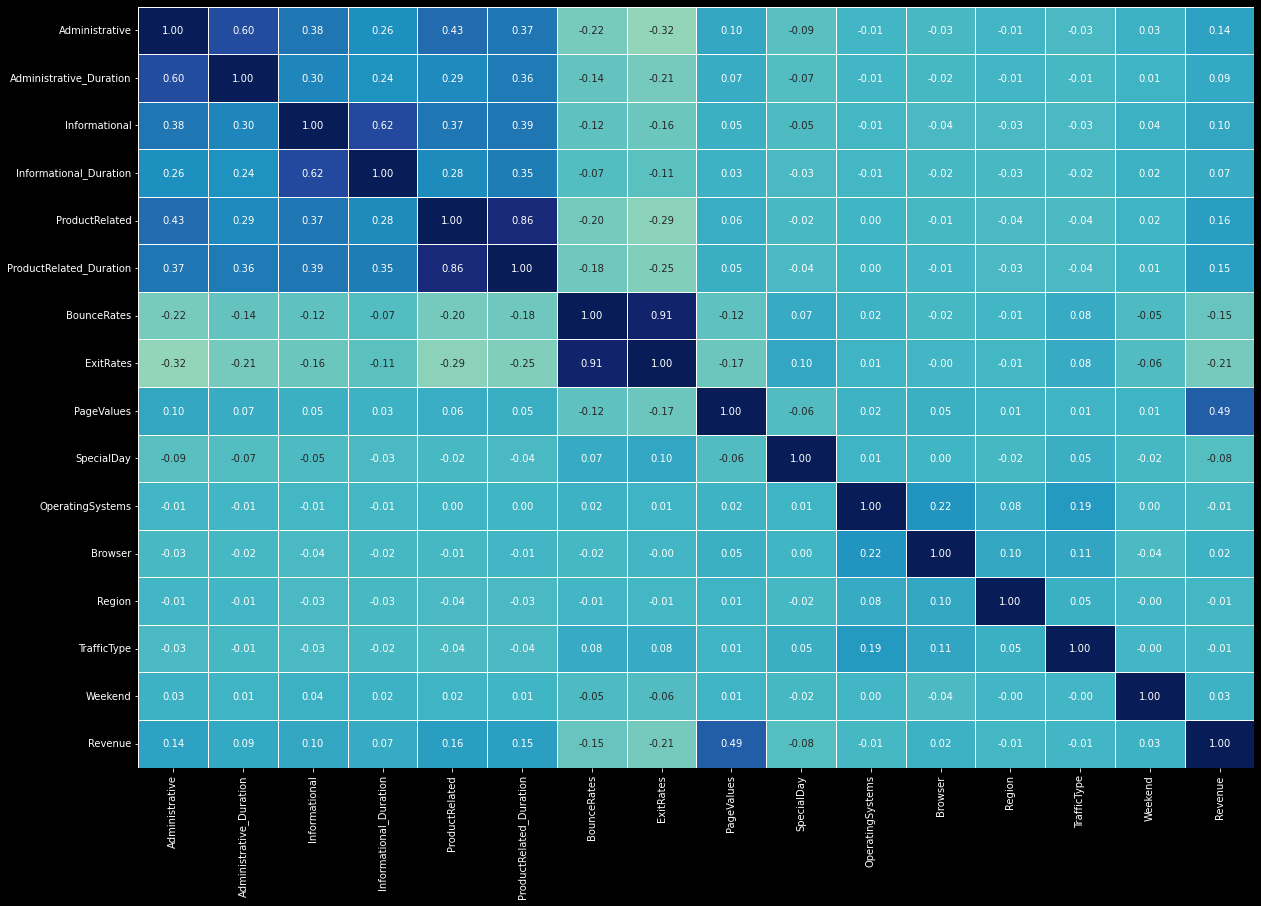

In [11]:
# bivariate analysis

plt.figure(figsize=(20,14))

sns.heatmap(data_raw.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu",
            fmt='0.2f')            

plt.show()